# Assignment #1 - Linear Regression


<font color="blue"> Sanika Suhas Pol </font>

# Introduction


<p style = 'text-align: justify;'><font>The purpose of this assignment is to study linear regression. Using the linear regression algorithm, we generate a model by fitting a linear equation on to the observed data to find the relationship between different variables and later predict the value of a quantitative variable. Linear regression has lot of application in real world. For example, we can predict sales in Walmart based simple factor like if a day is weekday or holiday.    </font></p>
  <p style = 'text-align: justify;'><font>  In this assignment we are using two methods, lease squares and lease mean squares to learn the linear regression models. First we implement both the methods and run the model on given data in usage examples. In the experiments section we train and use the model on our own dataset and see how well the model fits on the dataset.   </font></p>

# Data

## Description of Data

<p style = 'text-align: justify;'><font>This dataset is about bike sharing system. Bike sharing system allow users to rent bikes for short trips. This data has count as the target label which gives us the number of bikes rented for that hour. There are other attributes like temperature and season which influence the number of bikes rented.  </font></p>

Following is the attribute description as given at the data source: 

|       Name   | Description                                                                | 
|:-------------|:----------------------------------------------------------------------------|
|instant       |Index
|dteday        |Date
|season        |Season : 1 = spring;  2 = summer;  3 = fall;  4 = winter
|mnth          |Month (1-12)
|holiday       |If day is holiday = 1; otherwise = 0
|weekday       |Day of week (0 -6)
|workingday    |If day is neither weekend or holiday = 1; otherwise = 0
|weathersit    |1 = Clear, few clouds, partly clouds;  2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist;  3 = light snow, light rain & Thunderstorm & scattered clouds, light rain;  4 = heavy rain & ice pellets  & thunderstorm & mist, snow & fog  
|temp          |Normalized temperature in celsius calculated as : (t-t_min)/(t_max-t_min) where t_min = -8 and t_max = +39
|atemp         |Normalized feeling temperature in celsius calculated as : (t-t_min)/(t_max-t_min) where t_min = -15 and t_max = +50
|humidity      |Normalized humidity
|windspeed     |Normalized windspeed
|casual        |Count of casual users
|registered    |Count of registered users
|cnt           |Count of total rental bikes

I got this data from the UCI machine learning repository. Following is the link where this data can be found.<br> 
<a href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a>

## Plots for understanding or analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_r = pd.read_csv('hour.csv')
df_r.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_r.shape

(17379, 17)

In [4]:
df_r.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df_r.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
import seaborn as sns
corr_bike = df_r.corr()

corr_bike

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


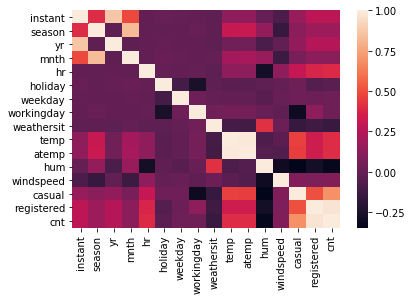

In [7]:
sns.heatmap(corr_bike)

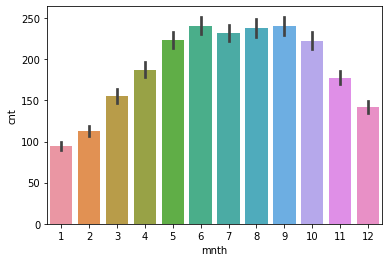

In [8]:
sns.barplot(x = 'mnth',y='cnt',data= df_r)

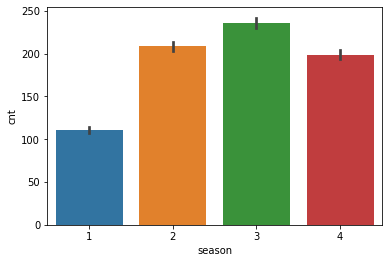

In [9]:
sns.barplot(x = 'season',y='cnt',data= df_r)

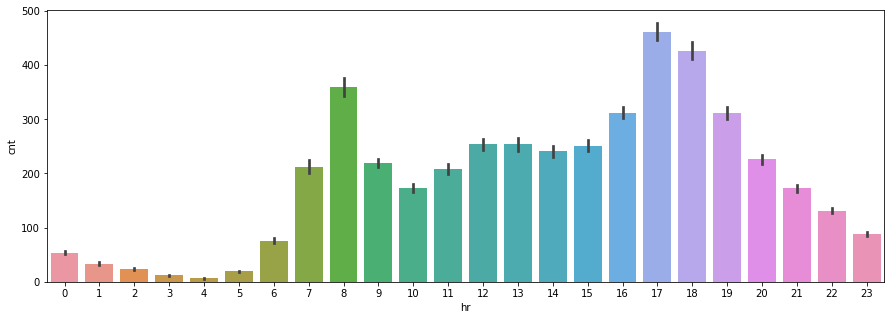

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'hr', y = 'cnt', data = df_r)

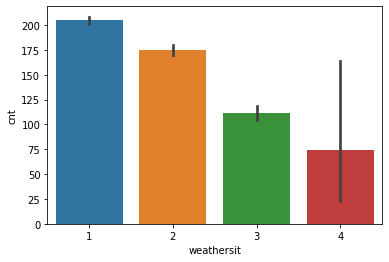

In [11]:
sns.barplot(x = 'weathersit', y = 'cnt', data = df_r)

([<matplotlib.patches.Wedge at 0x1a1f19aac8>,
 [Text(1.0522314301657523, 0.32063845273350483, 'casual'),
  Text(-0.32063845273350466, 1.0522314301657523, 'registered'),
  Text(-2.0206672185931328e-16, -1.1, 'cnt')])

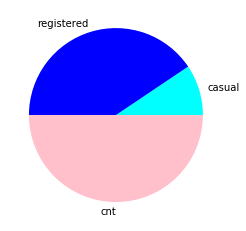

In [12]:
s = df_r.sum()[['casual','registered','cnt']]
plt.pie(x = s, labels = ['casual','registered','cnt'], colors = ['cyan','blue','pink'])

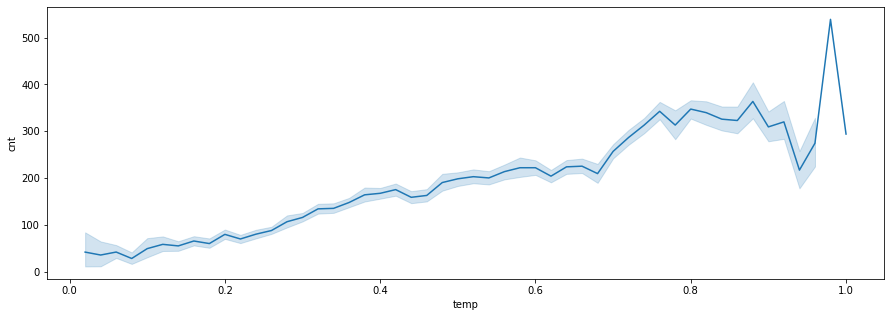

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x = 'temp', y = 'cnt', data = df_r)

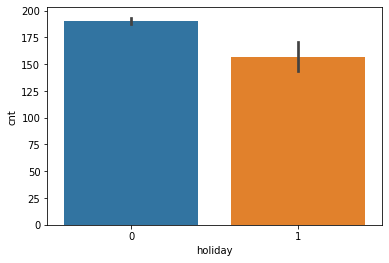

In [14]:
sns.barplot(x = 'holiday',y='cnt',data= df_r)

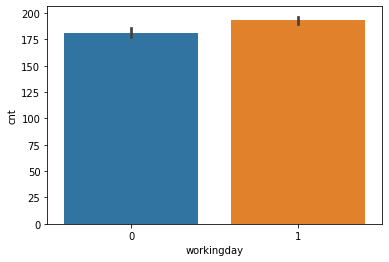

In [15]:
sns.barplot(x = 'workingday',y='cnt',data= df_r)

## Preliminary Observation

<p style = 'text-align: justify;'><font>I have plotted various graphs of the count of rented bikes vs different attributes and a heatmap. It is clear from the graphs that the count is dependent on several factors like temp, weather, season, month, hour. Out of these the most influencing attributes are temp and weather. Following are few graph-wise observations. <br>
<ul style="list-style-type:circle;">
    <li>People rent more bikes in Summer and Fall.</li>
    <li>Most bikes are rented between 7 am to 9 pm. It also shows that 5 pm to 7pm is the peak time to rent bikes.</li>
    <li>Highest number of bikes are rented when the weather is clear or partly cloudy. </li>
    <li>More bikes are rented during if the temperature is pleasant. For cold temperature the count of rental bile decreases.</li>
     <li>Number of bikes rented is large from months May to October compared to other months. </li>
    <li>The number of bikes rented on a weekday is more than the number of bikes rented on a weekend.</li>
    <li>More bikes are rented on a working day.</li>


## Preprocessing of the Data

<p style = 'text-align: justify;'><font>There are no null values in this dataset. The numerical values like temperature, humidity and windspeed are normalized. However, there are few attributes which are not very useful. For example, the columns causal and registered. The target label ‘cnt’ is the addition of ‘casual’ and ‘registered’. Since we already have the information of count, deleting the attributes 'casual' and 'registered'. The attributes temp and ‘atemp’ are almost similar. So deleting ‘atemp’ attribute. The attributes instant and date are also not useful. So deleting those attributes as well.</font></p>

In [16]:
df_r = df_r.drop(['instant','dteday','atemp','casual','registered'],axis=1)
df_r.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


## Review
### Linear Model
<p style = 'text-align: justify;'><font>
Linear model can be defined as a Euclidean dot product between two vectors:
$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where $w$ is a weight vector and $x$ is an input vector. 
When it is a one dimensional vector, it represents a straight line, so it is called *linear*. 

In linear regression, the output $t$ is a real number. Thus, ($y, t \in R$). When the data is linear or when we need simple solution, the linear model can suggest better solutions. One dimensional affine model can be written as:
$$
f(x; w) =  w_1 x + w_0.
$$
To calculate the accuracy of the model, we take into account the error which us the difference between the actual and predicted value. The error cost function is given by:
$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$

In this assignment we are using two approaches for building a model for linear regression. These are least squares and least mean square. 
</font></p>

### Least Squares

Using the above linear model and error calculation, the parameter which gives the best fit for lease squares is as follows: 

$$
w^* = \arg\min_w \sum_{i=1}^{N} \Big( f(x_i; w) - t_i \Big)^2
$$

Since the error function is quadratic, we set the derivative with respect to  𝐰  to zero. At the end the minimized error is:

$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$

### Least Mean Squares
<p style = 'text-align: justify;'><font>Least square can often be computationally costly, especially for large datasets as it uses all the available data for training and to find the best fit. Thus, if the data is sufficiently large, we can consider a sequential or online learning process where we introduce a data point one by one, and update the parameters. Later using the updated parameters, we makes a new estimations. <br>
For this, we start with an initial guess $w$ and changes it as it reads more data until it converges. 
When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This is called *stochastic gradient descent* or *sequential gradient descent*. After minimizing the error after each iteration the final rule for each sample is:
$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

</font></p>

## Implementation and description
### BaseModel and LinearModel 
<p style = 'text-align: justify;'><font>The LinearModel class inherits class BaseModel. 'BaseMode' is our super class where there are two abstract methods train and use. These methods are applicable to any model. In train method, we can train the data and in the use method we use the trained model to test the data. The class LinearModel inherits the methods and in addition implements few methods of its own. First we initialize the weight to None in the LinearModel class. In the check_matrix method we are checking if the passed variable is a 2-dimensional matrix. If is it not, we raise an exception. In the next method add_ones, we are adding a column of 1s to the input matrix. This is the bias that we are adding. </font></p>

### Least Squares
<p style = 'text-align: justify;'><font> We are implementing the Least Squares approach in the LinearRegress class which inherits LinearModel. We are calling the init function of parent class for initializing the weight w to none. In the train function we are using the LS formula 
$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$ 
Before we use the input matrix to train the model, we need to add the bias to it. Hence, we are calling the add_ones method from the parent class in the first line of train function.<br>
In the use function we are testing the model. We are returning the predicted value which will be in the form
$$
f(x; w) =  w_1 x + w_0.
$$

</font></p>


### Least Mean Squares
<p style = 'text-align: justify;'><font> In the LMS class we are implementing the Least Mean Square approach. In init, we are initializing the weight w and the learning rate alpha. In the train function we calling the train_step function for every value in the training set of input and target. In the train_step function, we are calculating and updating the weight for each step that is for each sample using the formula
$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$
In the use function, we are returning the predicted value of LMS.    
    </font></p>

### Super Classs Definition

In [17]:
import numpy as np 
from abc import ABC, abstractmethod
from IPython.core.debugger import set_trace

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [18]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = super().add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        Y = super().add_ones(X) @ self.w
        return Y

### Least Mean Squares

In [19]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x,t)
        
        #pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        
        if len(x.T.shape) !=2:
            x = np.insert(x,0,1).reshape(-1,1)
            
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
            
        y = self.w.T @ x 
        y = y - t
        
        self.w  = self.w - (self.alpha * y * x)
        
        #pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        Y = self.w.T @ super().add_ones(X).T
        return Y.T
        pass  ## TODO: replace this with your codes
        

### Usage Examples

In [20]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

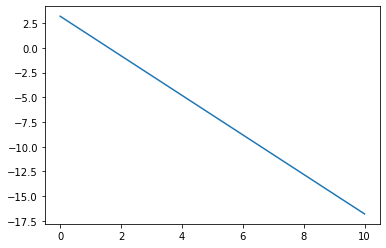

In [21]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)
plt.plot(ls.use(X))


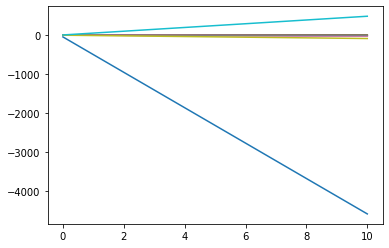

In [22]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

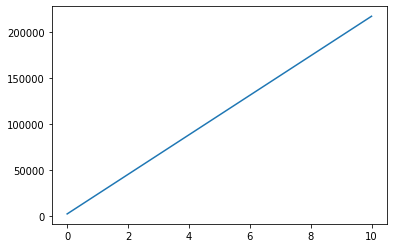

In [23]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments
### Description and Codes
<p style = 'text-align: justify;'><font>Here I am applying the LS and LMS to my bike sharing dataset. First I am partitioning the data into training and testing data. Training data is 80% while testing data is 20%. I have shuffled the data before splitting it into input and target sets using iloc function.  </font></p>

#### Partitioning the data


In [24]:
import numpy as np
import pandas as pd
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]


### Visualization of results

**This plot is temperature against count**

In [25]:
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['temp']].values.reshape(-1,1)
X_test = X_test.loc[:,['temp']].values.reshape(-1,1)

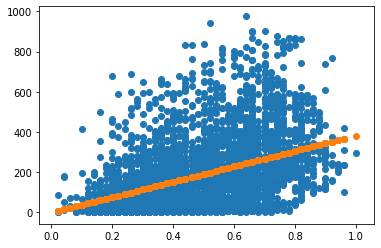

In [26]:
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

166.9730522852399


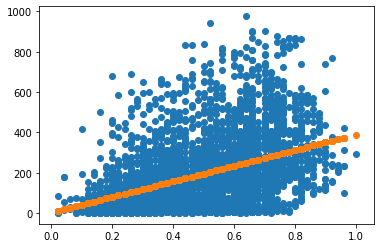

In [28]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)

In [29]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

167.0185203500719


**This plot is weather against count**

In [30]:
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['weathersit']].values.reshape(-1,1)
X_test = X_test.loc[:,['weathersit']].values.reshape(-1,1)

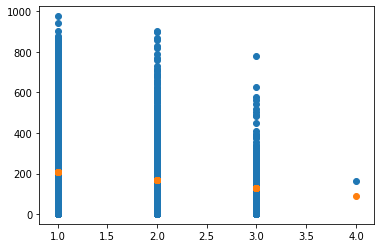

In [31]:
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)

In [32]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

179.81775693430825


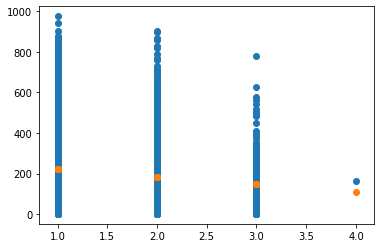

In [33]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)  

In [34]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

180.69687773740586


**This plot is season against count**

In [35]:
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['season']].values.reshape(-1,1)
X_test = X_test.loc[:,['season']].values.reshape(-1,1)

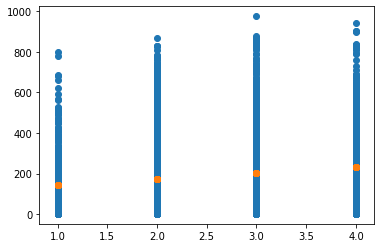

In [36]:
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)

In [37]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

179.34482075327367


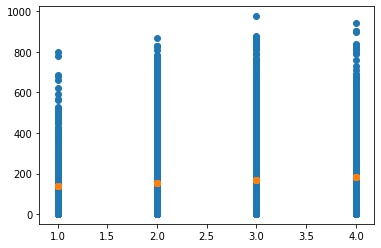

In [38]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)   

In [39]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

182.34570015415363


**This plot is hour against count**

In [40]:
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['hr']].values.reshape(-1,1)
X_test = X_test.loc[:,['hr']].values.reshape(-1,1)

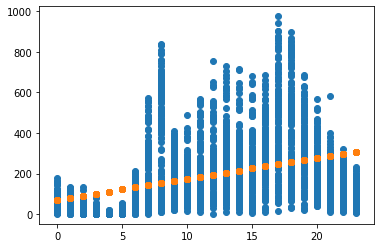

In [41]:
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)

In [42]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

168.25616405384304


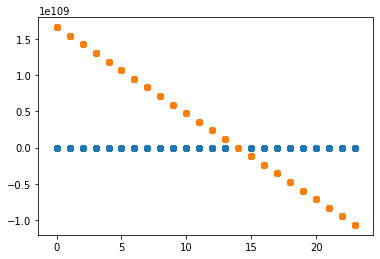

In [43]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)  

In [44]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

8.637731144988185e+108


**This plot is month against count**

In [45]:
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['mnth']].values.reshape(-1,1)
X_test = X_test.loc[:,['mnth']].values.reshape(-1,1)

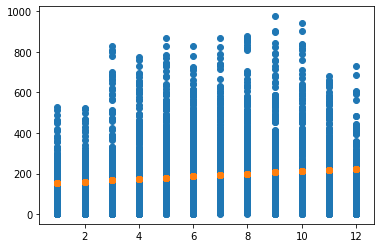

In [46]:
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted)

In [47]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

180.81020243810977


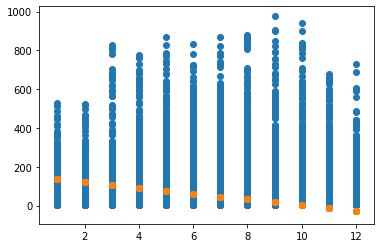

In [48]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_predicted) 

In [49]:
rmse = sqrt(mean_squared_error(Y_test,Y_predicted))
print(rmse)

237.06630260995817


### Analysis / Comparison of algorithms
As we have seen that LS uses the complete data like a batch to find the best fit for the model while LMS just considers one input a time. Thus in LMS we are training the data sequentially and minimizing the error. 

I have plotted graphs for count against various attributes. The orange line is the predicted target value while the blue points are actual values. I have used the root mean square error function to compare the accuracy of both the approaches. Even if computation of LS is generally high, the accuracy is better than LMS. For my dataset, the LS gives better results than LMS. 

Also, the accuracy of the LMS model is largely dependent on the learning rate. After trying many values of learning rate, I have chosen the learning such that rmse for LS is similar to LMS. If I increase or decrease the learning rate the accuracy of LMS is decreases.



# Conclusions
1. I learned how a model for linear regression works and difference between LS and LMS. 
2. Out of all given features, the temperature, season, weather and hour are more relevant than other features and have a greater influence on the target value count. 
2. Though, the model fits a line on the data, the accuracy of both LS and LMS is not very high. Thus this dataset is not the best choice for linear regression algorithms.

Following are few challenges I faced:
1. Reading and understanding already written code is a bit time consuming. 
2. Though running LMS train_step is computationally light, plotting every input is computationally heavy. Hence I am attaching an html file where I have run the model for LMS and graphs are already plotted. I am also putting the code in this file at the end. It is commnented as it takes time to plot. 


# References

1. UCI Machine Learning Repository: Bike Sharing Dataset Data Set, https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset Sharing Dataset.
2. CODE_DIYCODE_DIY 2055 bronze badges, et al. “Train Test Split without Using Scikit Learn.” Stack Overflow, 1 Mar. 1968, https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn.
3. “Linear Model ClassNote.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb
4. “Linear Model Workbook.” Jupyter Notebook Viewer, 
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
5. Géron Aurélien. Hands-on Machine Learning with Scikit-Learn and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems.
6. “Powerful Python Data Analysis Toolkit.” Pandas, https://pandas.pydata.org/pandas-docs/stable/.
7. “Overview.” Overview - Matplotlib 3.1.1 Documentation, https://matplotlib.org/3.1.1/contents.html.
8. “HTML5 Tutorial.” HTML Tutorial, https://www.w3schools.com/html/default.asp.
9. “Markdown.” / Wiki / Markdown Syntax, https://sourceforge.net/p/jupiter/wiki/markdown_syntax/.
10. “Statistical Data Visualization¶.” Seaborn, https://seaborn.pydata.org/index.html.





# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

weights: [1.51620779e-01 3.81623918e+02]


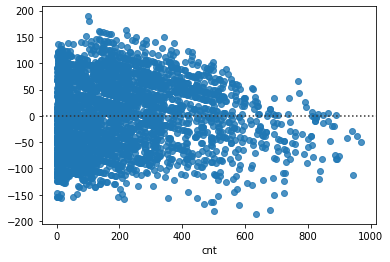

In [50]:
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['temp']].values.reshape(-1,1)
X_test = X_test.loc[:,['temp']].values.reshape(-1,1)
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
print('weights:',ls.w)
sns.residplot(Y_test,Y_predicted)

weights: [[  2.57532723]
 [390.50719265]]


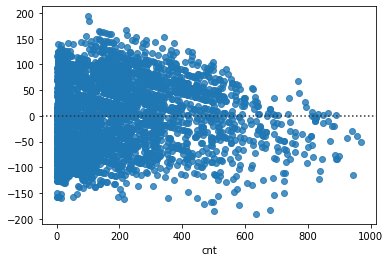

In [51]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
print('weights:',lms.w)
sns.residplot(Y_test,Y_predicted)

weights: [245.29331431 -39.40399601]


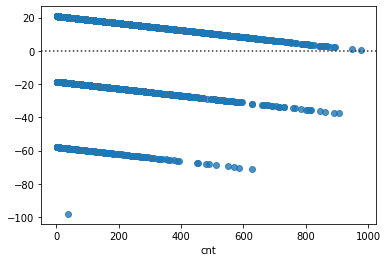

In [52]:
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['weathersit']].values.reshape(-1,1)
X_test = X_test.loc[:,['weathersit']].values.reshape(-1,1)
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
print('weights:',ls.w)
sns.residplot(Y_test,Y_predicted)

weights: [[255.67153113]
 [-41.86240312]]


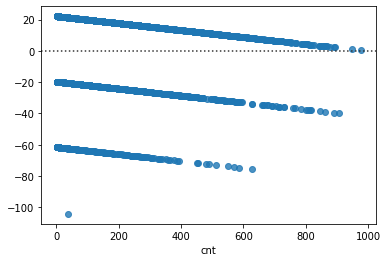

In [53]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
print('weights:',lms.w)
sns.residplot(Y_test,Y_predicted)

weights: [115.02627757  29.64174229]


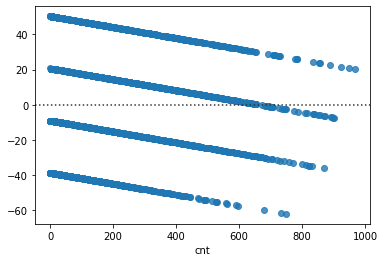

In [54]:
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['season']].values.reshape(-1,1)
X_test = X_test.loc[:,['season']].values.reshape(-1,1)
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
print('weights:',ls.w)
sns.residplot(Y_test,Y_predicted)

weights: [[117.47135855]
 [ 39.03779962]]


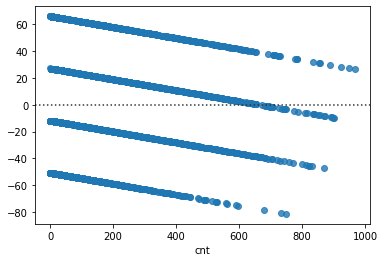

In [55]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
print('weights:',lms.w)
sns.residplot(Y_test,Y_predicted)

weights: [70.36896373 10.26366334]


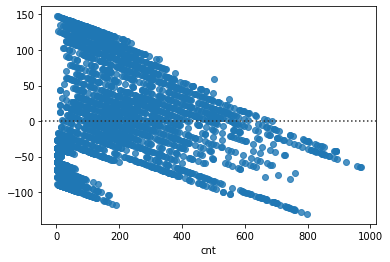

In [56]:
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['hr']].values.reshape(-1,1)
X_test = X_test.loc[:,['hr']].values.reshape(-1,1)
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
print('weights:',ls.w)
sns.residplot(Y_test,Y_predicted)

weights: [[ 9.78921944e+121]
 [-3.29754874e+122]]


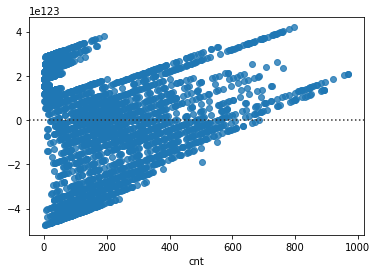

In [57]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
print('weights:',lms.w)
sns.residplot(Y_test,Y_predicted)

weights: [147.77650439   6.5484546 ]


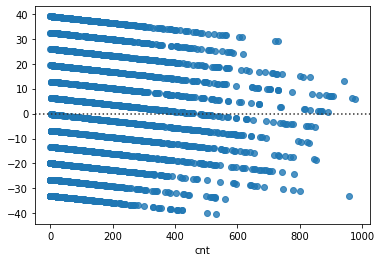

In [58]:
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['mnth']].values.reshape(-1,1)
X_test = X_test.loc[:,['mnth']].values.reshape(-1,1)
ls = LinearRegress()
ls.train(X_train, Y_train)
Y_predicted = ls.use(X_test)
print('weights:',ls.w)
sns.residplot(Y_test,Y_predicted)

weights: [[135.11084284]
 [ -3.92505744]]


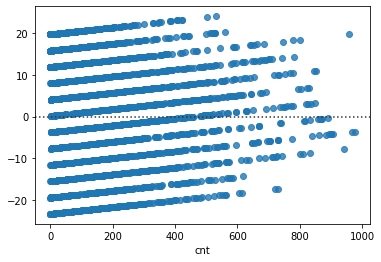

In [59]:
lms = LMS(0.009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
lms.train(X_train, Y_train)   
Y_predicted = lms.use(X_test)
print('weights:',lms.w)
sns.residplot(Y_test,Y_predicted)

## Analysis

As concluded before, this data is not the best choice for linear regression model. This same is eveident from the residual plots. Amongst all features, temperature is most significant feature. 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [60]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


In [61]:
'''import numpy as np
import pandas as pd
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['season']].values.reshape(-1,1)
X_test = X_test.loc[:,['season']].values.reshape(-1,1)

lms = LMS(0.00009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
    Y_predicted = lms.use(X_test)
    plt.scatter(X_test,Y_test)
    plt.scatter(X_test,Y_predicted) '''

"import numpy as np\nimport pandas as pd\nX = df_r    # input data\nY = df_r['cnt'] #target label\n\nindices = list(range(len(X)))\ntraining_instances = int(0.8 * X.shape[0])\nnp.random.shuffle(indices)\ntrain_indices = indices[:training_instances]\ntest_indices = indices[training_instances:]\nX_train, X_test = X.iloc[train_indices], X.iloc[test_indices]\nY_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]\nX_train = X_train.loc[:,['season']].values.reshape(-1,1)\nX_test = X_test.loc[:,['season']].values.reshape(-1,1)\n\nlms = LMS(0.00009)\nfor x, t in zip(X_train,Y_train):\n    lms.train_step(x, t)\n    Y_predicted = lms.use(X_test)\n    plt.scatter(X_test,Y_test)\n    plt.scatter(X_test,Y_predicted) "

In [62]:
'''import numpy as np
import pandas as pd
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['temp']].values.reshape(-1,1)
X_test = X_test.loc[:,['temp']].values.reshape(-1,1)

lms = LMS(0.00009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
    Y_predicted = lms.use(X_test)
    plt.scatter(X_test,Y_test)
    plt.scatter(X_test,Y_predicted) '''

"import numpy as np\nimport pandas as pd\nX = df_r    # input data\nY = df_r['cnt'] #target label\n\nindices = list(range(len(X)))\ntraining_instances = int(0.8 * X.shape[0])\nnp.random.shuffle(indices)\ntrain_indices = indices[:training_instances]\ntest_indices = indices[training_instances:]\nX_train, X_test = X.iloc[train_indices], X.iloc[test_indices]\nY_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]\nX_train = X_train.loc[:,['temp']].values.reshape(-1,1)\nX_test = X_test.loc[:,['temp']].values.reshape(-1,1)\n\nlms = LMS(0.00009)\nfor x, t in zip(X_train,Y_train):\n    lms.train_step(x, t)\n    Y_predicted = lms.use(X_test)\n    plt.scatter(X_test,Y_test)\n    plt.scatter(X_test,Y_predicted) "

In [63]:
'''import numpy as np
import pandas as pd
X = df_r    # input data
Y = df_r['cnt'] #target label

indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
X_train = X_train.loc[:,['mnth']].values.reshape(-1,1)
X_test = X_test.loc[:,['mnth']].values.reshape(-1,1)

lms = LMS(0.00009)
for x, t in zip(X_train,Y_train):
    lms.train_step(x, t)
    Y_predicted = lms.use(X_test)
    plt.scatter(X_test,Y_test)
    plt.scatter(X_test,Y_predicted) '''

"import numpy as np\nimport pandas as pd\nX = df_r    # input data\nY = df_r['cnt'] #target label\n\nindices = list(range(len(X)))\ntraining_instances = int(0.8 * X.shape[0])\nnp.random.shuffle(indices)\ntrain_indices = indices[:training_instances]\ntest_indices = indices[training_instances:]\nX_train, X_test = X.iloc[train_indices], X.iloc[test_indices]\nY_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]\nX_train = X_train.loc[:,['mnth']].values.reshape(-1,1)\nX_test = X_test.loc[:,['mnth']].values.reshape(-1,1)\n\nlms = LMS(0.00009)\nfor x, t in zip(X_train,Y_train):\n    lms.train_step(x, t)\n    Y_predicted = lms.use(X_test)\n    plt.scatter(X_test,Y_test)\n    plt.scatter(X_test,Y_predicted) "